In [2]:
#!venv\Scripts\activate.ps1
#!pip install -r requirements.txt

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

uci_data = pd.read_csv("train.csv")
unicamp_data = pd.read_csv("Dataset_5971.csv")
pd.set_option('display.max_colwidth',None)


After importing the necessary libraries, the next step is to clean the data, in this case, two different data sets are being used, `train.csv` is the data set from [UCI machine learning repository](https://archive.ics.uci.edu/dataset/228/sms+spam+collection) and `Dataset_5971.csv` was taken from this research paper: [SMS PHISHING DATASET FOR MACHINE LEARNING AND PATTERN RECOGNITION](https://data.mendeley.com/datasets/f45bkkt8pr/1)

the next step is to clean the data sets, and label them correctly


In [4]:
from sklearn.preprocessing import OrdinalEncoder

unicamp_data.rename(columns={'TEXT':'sms'},inplace=True)
columns_change = ['label','URL','EMAIL','PHONE']
uniData = unicamp_data.copy()
ord_enc = OrdinalEncoder()
uniData[columns_change] = ord_enc.fit_transform(unicamp_data[columns_change])



In [5]:
unicamp_data.iloc[117]

label                                                                                                                                                                    Spam
sms      \tEnjoy the jamster videosound gold club with your credits for 2 new videosounds+2 logos+musicnews! get more fun from jamster.co.uk! 16+only Help? call: 09701213186
URL                                                                                                                                                                        No
EMAIL                                                                                                                                                                      No
PHONE                                                                                                                                                                     yes
Name: 117, dtype: object

After testing for a while I noticed that my second data set had more than one style of writing 'spam' and also contained 'Spam' and the same thing for smishing.

In the case of smishing I will merge it to be the same as spam, since both terms related to the same thing and purpose of the research.

In [6]:
unicamp_data.loc[unicamp_data.label == 'Spam','label'] = 'spam'
unicamp_data.loc[unicamp_data.label == 'smishing','label'] = 'spam'
unicamp_data.loc[unicamp_data.label == 'Smishing','label'] = 'spam'

unicamp_data.loc[unicamp_data.label == 'Smishing']

Empty DataFrame
Columns: [label, sms, URL, EMAIL, PHONE]
Index: []

After erasing the spelling problems it is viable to apply the Ordinal Encoder to our data set, another step to simplify and test more, will be ereasing the url, email and phone for the moment, It is contemplated to take in count in the next steps

In [7]:
unicamp_data.drop(columns=['URL','EMAIL','PHONE'],axis=1,inplace=True)
columns_change = ['label']
unicamp_data

label  \
0      ham   
1      ham   
2      ham   
3      ham   
4     spam   
...    ...   
5966   ham   
5967   ham   
5968   ham   
5969   ham   
5970   ham   

                                                                                                                                                                                sms  
0                                          Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..  
1                                                                                                   What's up? Do you want me to come online? If you are free we can talk sometime�  
2                                                                                                                                                      So u workin overtime nigpun?  
3     Also sir, i sent you an email about how to log into the usc payment portal. I.ll send you another message that should explain how things are back home. Have a great weekend.  
4                          Please Stay At Home. To encourage the notion of staying at home. All tax-paying citizens are entitled to �305.96 or more emergency refund. smsg.io/fCVbD  
...                                                                                                                                                                             ...  
5966                                                                                                                                                       :( but your not here....  
5967                                                                   Becoz its  &lt;#&gt;  jan whn al the post ofice is in holiday so she cn go fr the post ofice...got it duffer  
5968                         Its a valentine game. . . send dis msg to all ur friends. . If 5 answers r d same then someone really loves u. . Ques- which colour suits me the best?  
5969                                                                                                                                                          We r outside already.  
5970                                              The Xmas story is peace.. The Xmas msg is love.. The Xmas miracle is jesus.. Hav a blessed month ahead &amp; wish U Merry Xmas...  

[5971 rows x 2 columns]

After deleting necessary columns we can fit the encoder, which is a fast way to set ham and spam as number values

In [8]:
uniData = unicamp_data.copy()
uniData[columns_change] = ord_enc.fit_transform(unicamp_data[columns_change])

In [9]:
uniData

label  \
0       0.0   
1       0.0   
2       0.0   
3       0.0   
4       1.0   
...     ...   
5966    0.0   
5967    0.0   
5968    0.0   
5969    0.0   
5970    0.0   

                                                                                                                                                                                sms  
0                                          Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..  
1                                                                                                   What's up? Do you want me to come online? If you are free we can talk sometime�  
2                                                                                                                                                      So u workin overtime nigpun?  
3     Also sir, i sent you an email about how to log into the usc payment portal. I.ll send you another message that should explain how things are back home. Have a great weekend.  
4                          Please Stay At Home. To encourage the notion of staying at home. All tax-paying citizens are entitled to �305.96 or more emergency refund. smsg.io/fCVbD  
...                                                                                                                                                                             ...  
5966                                                                                                                                                       :( but your not here....  
5967                                                                   Becoz its  &lt;#&gt;  jan whn al the post ofice is in holiday so she cn go fr the post ofice...got it duffer  
5968                         Its a valentine game. . . send dis msg to all ur friends. . If 5 answers r d same then someone really loves u. . Ques- which colour suits me the best?  
5969                                                                                                                                                          We r outside already.  
5970                                              The Xmas story is peace.. The Xmas msg is love.. The Xmas miracle is jesus.. Hav a blessed month ahead &amp; wish U Merry Xmas...  

[5971 rows x 2 columns]

# Text preprosessing
first, the text will be tokenized as is, after that, there will be experiments without stop words and applying stemmig technics


## SEGMENTING THE TEXT

In [10]:
import nltk
from nltk.tokenize import TweetTokenizer

#tweet tokenizer will be more useful to segment regular text messages conversations
nltk_tok = TweetTokenizer()


In [11]:
#this will be an example how the data will look
size = uniData.shape[0]
str = uniData.sms[size-1]
print(str)
str = nltk_tok.tokenize(str)
print(str)

The Xmas story is peace.. The Xmas msg is love.. The Xmas miracle is jesus.. Hav a blessed month ahead &amp; wish U Merry Xmas...
['The', 'Xmas', 'story', 'is', 'peace', '..', 'The', 'Xmas', 'msg', 'is', 'love', '..', 'The', 'Xmas', 'miracle', 'is', 'jesus', '..', 'Hav', 'a', 'blessed', 'month', 'ahead', '&', 'wish', 'U', 'Merry', 'Xmas', '...']


In [12]:

def separate_string(df,column_size):
    for i in range(column_size):
        str = df.loc[i,'sms']
        lis = nltk_tok.tokenize(str)
        df.sms[i] = lis

separate_string(uniData,size)

uniData

C:\Users\arman\AppData\Local\Temp\ipykernel_28076\1036863228.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.sms[i] = lis
C:\Users\arman\AppData\Local\Temp\ipykernel_28076\1036863228.py:5: SettingWithCopyWarning: 
A value is trying to

label  \
0       0.0   
1       0.0   
2       0.0   
3       0.0   
4       1.0   
...     ...   
5966    0.0   
5967    0.0   
5968    0.0   
5969    0.0   
5970    0.0   

                                                                                                                                                                                                                          sms  
0                                   [Your, opinion, about, me, ?, 1, ., Over, 2, ., Jada, 3, ., Kusruthi, 4, ., Lovable, 5, ., Silent, 6, ., Spl, character, 7, ., Not, matured, 8, ., Stylish, 9, ., Simple, Pls, reply, ..]  
1                                                                                                                     [What's, up, ?, Do, you, want, me, to, come, online, ?, If, you, are, free, we, can, talk, sometime, �]  
2                                                                                                                                                                                        [So, u, workin, overtime, nigpun, ?]  
3     [Also, sir, ,, i, sent, you, an, email, about, how, to, log, into, the, usc, payment, portal, ., I.ll, send, you, another, message, that, should, explain, how, things, are, back, home, ., Have, a, great, weekend, .]  
4                                   [Please, Stay, At, Home, ., To, encourage, the, notion, of, staying, at, home, ., All, tax-paying, citizens, are, entitled, to, �, 305.96, or, more, emergency, refund, ., smsg.io/fCVbD]  
...                                                                                                                                                                                                                       ...  
5966                                                                                                                                                                                          [:(, but, your, not, here, ...]  
5967                                                                                          [Becoz, its, <#>, jan, whn, al, the, post, ofice, is, in, holiday, so, she, cn, go, fr, the, post, ofice, ..., got, it, duffer]  
5968                           [Its, a, valentine, game, . . ., send, dis, msg, to, all, ur, friends, . ., If, 5, answers, r, d, same, then, someone, really, loves, u, . ., Ques, -, which, colour, suits, me, the, best, ?]  
5969                                                                                                                                                                                             [We, r, outside, already, .]  
5970                                                          [The, Xmas, story, is, peace, .., The, Xmas, msg, is, love, .., The, Xmas, miracle, is, jesus, .., Hav, a, blessed, month, ahead, &, wish, U, Merry, Xmas, ...]  

[5971 rows x 2 columns]

## STEMMING AND LEMMATIZATION

First is important to download the word net(a virtual dictionary) to access it trought nltk  

In [13]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
uniData

label  \
0       0.0   
1       0.0   
2       0.0   
3       0.0   
4       1.0   
...     ...   
5966    0.0   
5967    0.0   
5968    0.0   
5969    0.0   
5970    0.0   

                                                                                                                                                                                                                          sms  
0                                   [Your, opinion, about, me, ?, 1, ., Over, 2, ., Jada, 3, ., Kusruthi, 4, ., Lovable, 5, ., Silent, 6, ., Spl, character, 7, ., Not, matured, 8, ., Stylish, 9, ., Simple, Pls, reply, ..]  
1                                                                                                                     [What's, up, ?, Do, you, want, me, to, come, online, ?, If, you, are, free, we, can, talk, sometime, �]  
2                                                                                                                                                                                        [So, u, workin, overtime, nigpun, ?]  
3     [Also, sir, ,, i, sent, you, an, email, about, how, to, log, into, the, usc, payment, portal, ., I.ll, send, you, another, message, that, should, explain, how, things, are, back, home, ., Have, a, great, weekend, .]  
4                                   [Please, Stay, At, Home, ., To, encourage, the, notion, of, staying, at, home, ., All, tax-paying, citizens, are, entitled, to, �, 305.96, or, more, emergency, refund, ., smsg.io/fCVbD]  
...                                                                                                                                                                                                                       ...  
5966                                                                                                                                                                                          [:(, but, your, not, here, ...]  
5967                                                                                          [Becoz, its, <#>, jan, whn, al, the, post, ofice, is, in, holiday, so, she, cn, go, fr, the, post, ofice, ..., got, it, duffer]  
5968                           [Its, a, valentine, game, . . ., send, dis, msg, to, all, ur, friends, . ., If, 5, answers, r, d, same, then, someone, really, loves, u, . ., Ques, -, which, colour, suits, me, the, best, ?]  
5969                                                                                                                                                                                             [We, r, outside, already, .]  
5970                                                          [The, Xmas, story, is, peace, .., The, Xmas, msg, is, love, .., The, Xmas, miracle, is, jesus, .., Hav, a, blessed, month, ahead, &, wish, U, Merry, Xmas, ...]  

[5971 rows x 2 columns]

In [15]:
from nltk.stem import WordNetLemmatizer

def lemmatize_data(data):
    wnl = WordNetLemmatizer()
    punctuations = "?:!.,;�"
    #replace whole string with the lemmatized strings
    for i in range(data.shape[0]):
        j=0
        while j < len(data.loc[i,'sms']):
            w = data.loc[i,'sms'][j]
            if w in punctuations:
                data.loc[i,'sms'].remove(w)
            else:
                w = wnl.lemmatize(w.lower())
                data.loc[i,'sms'][j] = w
            j+=1
        data.loc[i,'sms'] = " ".join( data.loc[i,'sms'])

lemmatize_data(uniData)
uniData

label  \
0       0.0   
1       0.0   
2       0.0   
3       0.0   
4       1.0   
...     ...   
5966    0.0   
5967    0.0   
5968    0.0   
5969    0.0   
5970    0.0   

                                                                                                                                                                           sms  
0                                              your opinion about me 1 Over 2 Jada 3 Kusruthi 4 Lovable 5 Silent 6 Spl character 7 Not matured 8 Stylish 9 Simple pls reply ..  
1                                                                                                 what's up Do you want me to come online If you are free we can talk sometime  
2                                                                                                                                                  so u workin overtime nigpun  
3     also sir i sent you an email about how to log into the usc payment portal I.ll send you another message that should explain how thing are back home Have a great weekend  
4                          please stay at home To encourage the notion of staying at home All tax-paying citizen are entitled to 305.96 or more emergency refund smsg.io/fCVbD  
...                                                                                                                                                                        ...  
5966                                                                                                                                                  :( but your not here ...  
5967                                                                     becoz it <#> jan whn al the post ofice is in holiday so she cn go fr the post ofice ... got it duffer  
5968                      it a valentine game . . . send dis msg to all ur friend . . if 5 answer r d same then someone really love u . . ques - which colour suit me the best  
5969                                                                                                                                                      we r outside already  
5970                                         the xmas story is peace .. the xmas msg is love .. the xmas miracle is jesus .. hav a blessed month ahead & wish u merry xmas ...  

[5971 rows x 2 columns]

In [16]:
from sklearn.model_selection import train_test_split
X = uniData.sms
y = uniData.label

#train split
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=0)
print([X_train.shape, X_valid.shape])


[(4776,), (1195,)]


## TYPES OF "EMBEDDING"
this research explores different types of techniques to analyze the effects in text categorization
- Count Vectorizer*
- Word2Vec
- BERT
- TF-IDF*
- Hashing vectorizer*
- GloVe

every technique will be also tested in these types of models
- Naive Bayes Classification
- K-Nearest neighbors
- Decision Tree Classification
- Random Forest Classification
- Long Short Term Memory (Recurrent Neural Network)

### Count vectorizer

In [17]:
import scipy.sparse as sps

import tensorflow as tf
from tensorflow import keras

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score, accuracy_score, balanced_accuracy_score, ConfusionMatrixDisplay


In [35]:
#precondition: pass prossed data
def model_test(train_data,train_labels,valid_data,valid_labels,num_epochs,method_name):
    
    if(method_name != 'Hashing Vectorizer'):
        model = MultinomialNB()
        model.fit(train_data, train_labels)

    forest_model = RandomForestClassifier(random_state=0)
    forest_model.fit(train_data, train_labels)

    dt_model = DecisionTreeClassifier(random_state=0)
    dt_model.fit(train_data, train_labels)

    kn_model = KNeighborsClassifier()
    kn_model.fit(train_data, train_labels)
    
    if(method_name != 'Hashing Vectorizer'):
        #evaluate naive bayes model
        predictions_NB = model.predict(valid_data)
        accuracy_NB = accuracy_score( valid_labels, predictions_NB)
        balanced_accuracy_NB = balanced_accuracy_score(valid_labels, predictions_NB)
        precision_NB = precision_score(valid_labels, predictions_NB)
    
        print("MultinomialNB --- Accuracy:",round(100*accuracy_NB,2),'%')
        print("MultinomialNB --- Balanced accuracy:",round(100*balanced_accuracy_NB,2),'%')
        print("MultinomialNB --- Precision:", round(100*precision_NB,2),'%')

    #evaluate random forest model
    predictions_RF = forest_model.predict(valid_data)
    accuracy_RF = accuracy_score(valid_labels, predictions_RF)
    balanced_accuracy_RF = balanced_accuracy_score(valid_labels, predictions_RF)
    precision_RF = precision_score(valid_labels, predictions_RF)

    print("\nRandomForestRegressor --- Accuracy:",round(100*accuracy_RF,2),'%')
    print("RandomForestRegressor --- Balanced accuracy:",round(100*balanced_accuracy_RF,2),'%')
    print("RandomForestRegressor --- Precision:", round(100*precision_RF,2),'%')

    #desition tree model
    predictions_dt = dt_model.predict(valid_data)
    accuracy_dt = accuracy_score( valid_labels, predictions_dt)
    balanced_accuracy_dt = balanced_accuracy_score(valid_labels, predictions_dt)
    precision_dt = precision_score(valid_labels, predictions_dt)

    print("\nDecision Tree --- Accuracy:",round(100*accuracy_dt,2),'%')
    print("Decision Tree --- Balanced accuracy:",round(100*balanced_accuracy_dt,2),'%')
    print("Decision Tree --- Precision:", round(100*precision_dt,2),'%')

    #K-NN model
    predictions_kn = kn_model.predict(valid_data)
    accuracy_kn = accuracy_score( valid_labels, predictions_kn)
    balanced_accuracy_kn = balanced_accuracy_score(valid_labels, predictions_kn)
    precision_kn = precision_score(valid_labels, predictions_kn)

    print("\nK-NN --- Accuracy:",round(100*accuracy_kn,2),'%')
    print("K-NN --- Balanced accuracy:",round(100*balanced_accuracy_kn,2),'%')
    print("K-NN --- Precision:", round(100*precision_kn,2),'%')

    #print(type(train_data))
    #train_data = np.array(train_data.toarray(),dtype=np.float64)
    #train_labels = np.array(train_data.toarray(),dtype=np.float64)

    #valid_data = np.array(valid_data.toarray(),dtype=np.float64)
    #train_labels = np.array(train_data.toarray(),dtype=np.float64)

   # vocab_size = 10000
    #embedding_dim = 3
    #LSTM_model = tf.keras.Sequential([
    #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(activation='relu', input_shape=(timesteps, features))),
    #tf.keras.layers.GlobalAveragePooling1D(),
    #tf.keras.layers.Dense(16, activation='relu'),
    #tf.keras.layers.Dense(1)
    #])
    #LSTM_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

    #LSTM_model.summary()
    
    #history = LSTM_model.fit(train_data, train_labels, epochs=num_epochs, validation_data=(valid_data,valid_labels), verbose=0)
    #return history
    
    if(method_name != 'Hashing Vectorizer'):
        metrics_NB = [round(100*accuracy_NB, 2), round(100*balanced_accuracy_NB, 2), round(100*precision_NB, 2)]
    metrics_RF = [round(100*accuracy_RF, 2), round(100*balanced_accuracy_RF, 2), round(100*precision_RF, 2)]
    metrics_dt = [round(100*accuracy_dt, 2), round(100*balanced_accuracy_dt, 2), round(100*precision_dt, 2)]
    metrics_kn = [round(100*accuracy_kn, 2), round(100*balanced_accuracy_kn, 2), round(100*precision_kn, 2)]
    
    labels = ['Accuracy', 'Balanced Accuracy', 'Precision']
    x = np.arange(len(labels))  # the label locations
    width = 0.2  # the width of the bars
    
    fig, ax = plt.subplots()
    if(method_name != 'Hashing Vectorizer'):
        rects1 = ax.bar(x - 3*width/2, metrics_NB, width, label='MultinomialNB')
        rects2 = ax.bar(x - width/2, metrics_RF, width, label='RandomForestRegressor')
        rects3 = ax.bar(x + width/2, metrics_dt, width, label='Decision Tree')
        rects4 = ax.bar(x + 3*width/2, metrics_kn, width, label='K-NN')
    else:
        rects2 = ax.bar(x - width, metrics_RF, width, label='RandomForestRegressor')
        rects3 = ax.bar(x, metrics_dt, width, label='Decision Tree')
        rects4 = ax.bar(x + width, metrics_kn, width, label='K-NN')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Percentage')
    ax.set_title('Metrics by model, using ' + method_name)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    #ax.set_xlim([0, 100]) 
    ax.set_ylim([0, 100])
    ax.legend()
    
    fig.tight_layout()
    
    plt.show()
 


MultinomialNB --- Accuracy: 98.08 %
MultinomialNB --- Balanced accuracy: 97.35 %
MultinomialNB --- Precision: 94.14 %

RandomForestRegressor --- Accuracy: 97.49 %
RandomForestRegressor --- Balanced accuracy: 93.59 %
RandomForestRegressor --- Precision: 100.0 %

Decision Tree --- Accuracy: 96.74 %
Decision Tree --- Balanced accuracy: 93.77 %
Decision Tree --- Precision: 94.12 %

K-NN --- Accuracy: 89.62 %
K-NN --- Balanced accuracy: 73.5 %
K-NN --- Precision: 100.0 %


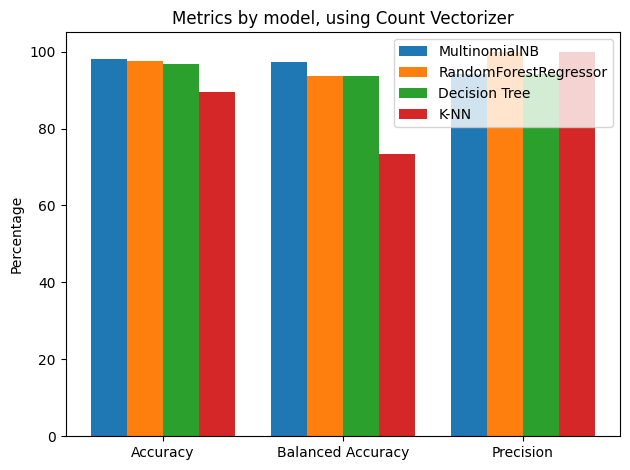

In [23]:
#declare variables for Count Vectorizer
vect = CountVectorizer()
cntV_train_data   = vect.fit_transform(X_train)
cntV_valid_data   = vect.transform(X_valid)
first = model_test(cntV_train_data,y_train,cntV_valid_data ,y_valid,num_epochs=5,method_name="Count Vectorizer")

MultinomialNB --- Accuracy: 96.9 %
MultinomialNB --- Balanced accuracy: 92.42 %
MultinomialNB --- Precision: 99.0 %

RandomForestRegressor --- Accuracy: 97.74 %
RandomForestRegressor --- Balanced accuracy: 94.23 %
RandomForestRegressor --- Precision: 100.0 %

Decision Tree --- Accuracy: 96.49 %
Decision Tree --- Balanced accuracy: 92.8 %
Decision Tree --- Precision: 94.86 %

K-NN --- Accuracy: 88.54 %
K-NN --- Balanced accuracy: 70.73 %
K-NN --- Precision: 100.0 %


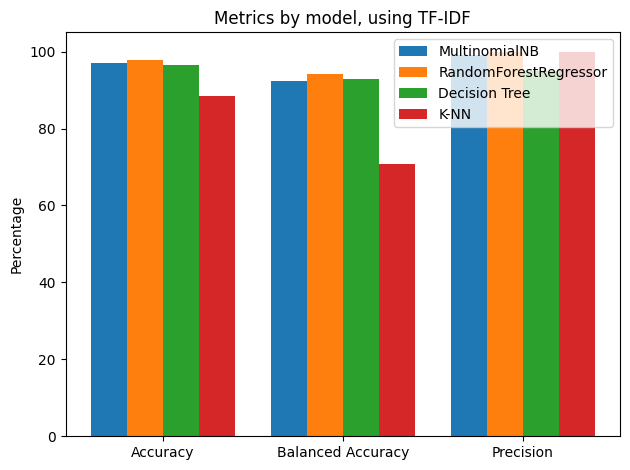

In [24]:
#declare variables for Tfidf
Tfid = TfidfVectorizer(sublinear_tf=True)
Tfid_train_data   = Tfid.fit_transform(X_train)
Tfid_valid_data   = Tfid.transform(X_valid)
Tfid_model = model_test(Tfid_train_data,y_train,Tfid_valid_data ,y_valid,num_epochs=5,method_name="TF-IDF")


RandomForestRegressor --- Accuracy: 96.82 %
RandomForestRegressor --- Balanced accuracy: 91.88 %
RandomForestRegressor --- Precision: 100.0 %

Decision Tree --- Accuracy: 96.74 %
Decision Tree --- Balanced accuracy: 94.09 %
Decision Tree --- Precision: 93.33 %

K-NN --- Accuracy: 89.46 %
K-NN --- Balanced accuracy: 73.08 %
K-NN --- Precision: 100.0 %


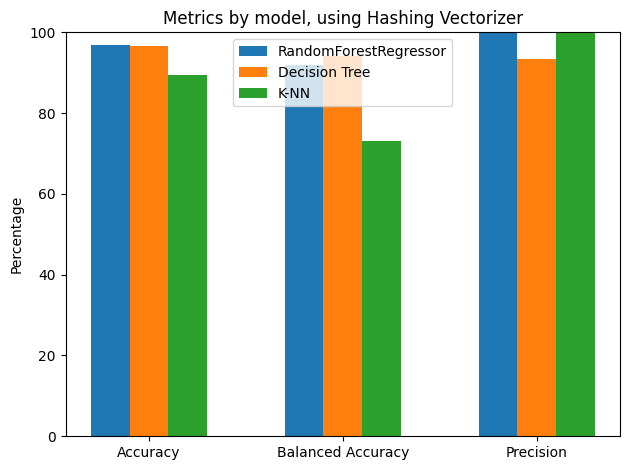

In [38]:
#declare variables for Hasing Vectorizer
hv = HashingVectorizer()
hv_train_data   = hv.fit_transform(X_train)
hv_valid_data   = hv.transform(X_valid)
hv_model = model_test(hv_train_data,y_train,hv_valid_data ,y_valid,num_epochs=5,method_name="Hashing Vectorizer")

In [28]:
print(hv_valid_data[0].toarray())

[[0. 0. 0. ... 0. 0. 0.]]


## 2- EMBEDING

In [ ]:
import numpy as np
#convert data types to make it work with tensor flow
t_padded = np.array(t_padded, dtype=np.float64)
y_train = np.array(y_train, dtype=np.float64)

v_padded = np.array(v_padded, dtype=np.float64)
y_valid = np.array(y_valid, dtype=np.float64)

NameError: name 't_padded' is not defined

In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

## 2. MODEL TRANING

In [ ]:
model_1.summary()
#emb = model_1.layers[0].get_weights()[0]
#print(emb[t_word_index['i']])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
num_epochs = 40
history = model_1.fit(t_padded, y_train, epochs=num_epochs, validation_data=(v_padded,y_valid), verbose=2)

Epoch 1/40
150/150 - 2s - 10ms/step - accuracy: 0.8128 - loss: 0.4826 - val_accuracy: 0.8042 - val_loss: 0.4708
Epoch 2/40
150/150 - 0s - 2ms/step - accuracy: 0.8130 - loss: 0.4623 - val_accuracy: 0.8042 - val_loss: 0.4613
Epoch 3/40
150/150 - 0s - 2ms/step - accuracy: 0.8130 - loss: 0.4531 - val_accuracy: 0.8042 - val_loss: 0.4416
Epoch 4/40
150/150 - 0s - 2ms/step - accuracy: 0.8130 - loss: 0.4282 - val_accuracy: 0.8042 - val_loss: 0.3845
Epoch 5/40
150/150 - 0s - 2ms/step - accuracy: 0.8180 - loss: 0.3643 - val_accuracy: 0.8795 - val_loss: 0.2776
Epoch 6/40
150/150 - 0s - 2ms/step - accuracy: 0.8815 - loss: 0.2682 - val_accuracy: 0.9423 - val_loss: 0.1788
Epoch 7/40
150/150 - 0s - 2ms/step - accuracy: 0.9405 - loss: 0.1794 - val_accuracy: 0.9657 - val_loss: 0.1244
Epoch 8/40
150/150 - 0s - 2ms/step - accuracy: 0.9650 - loss: 0.1276 - val_accuracy: 0.9632 - val_loss: 0.1012
Epoch 9/40
150/150 - 0s - 2ms/step - accuracy: 0.9709 - loss: 0.1017 - val_accuracy: 0.9782 - val_loss: 0.0911


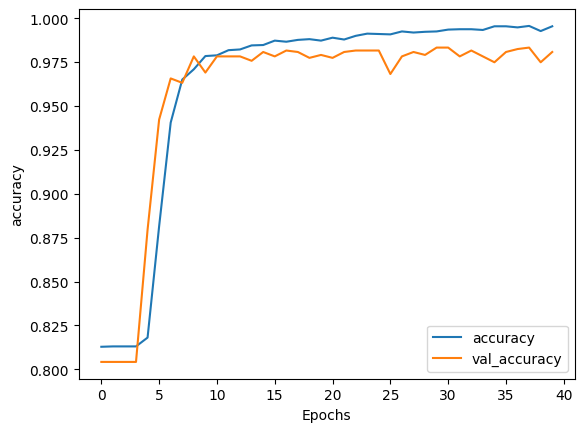

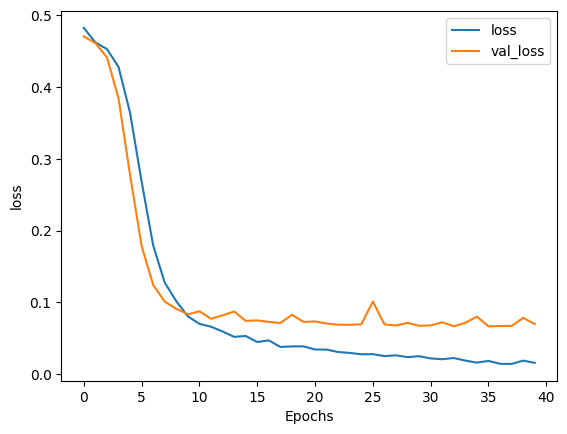

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## 3-FUN GRAPHING

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

#to implement padding fo r the lenght of sequences, advance technic called ragged tensor
from tensorflow.keras.preprocessing.sequence import pad_sequences
vocab_size = 10000
embedding_dim = 16
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 4800

#Data is needed to be in list to work with the tokenizeer
X_train = list(X_train)
X_valid = list(X_valid)

#fit and declare the tokenizer
tok = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tok.fit_on_texts(X_train)

t_word_index = tok.word_index #get the word index (dictionary)

#this is only for training data
t_sequences = tok.texts_to_sequences(X_train) #create the sentence sequence inside the list
t_padded = pad_sequences(t_sequences, padding = padding_type) #deal with large sentences

#print(test_sentences)
print(t_word_index)
print(t_padded)
print(t_padded.shape)

#for test data
v_sequences = tok.texts_to_sequences(X_valid) #create the sentence sequence inside the list
v_padded = pad_sequences(v_sequences, padding = padding_type) #deal with large sentences
v_padded

print(v_padded.shape)
print(t_padded.shape)
print(y_valid)

## 4 - testing accuracy

In [ ]:
pred_test = uci_data.sms[1:2]
pred_test = tok.texts_to_sequences(pred_test)
padd = pad_sequences(pred_test,padding=padding_type)
prediction = model_1.predict(padd)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
[[1.6534882e-24]]
